# Loading data

In [1]:
import pandas as pd

text = pd.read_csv('text_final.csv', index_col='SCENE')
text.head()

,Embedding_0,Embedding_1,Embedding_2,Embedding_3,Embedding_4,Embedding_5,Embedding_6,Embedding_7,Embedding_8,Embedding_9,...,PERSON1,PERSON3,PHOEBE,RACHEL,RAJ,RICHARD,ROSE,ROSS,SHELDON,STUART
SCENE,,,,,,,,,,,,,,,,,,,,,
1_10004,0.400577,-0.735008,-0.096150,-0.285756,-0.357918,-0.051856,1.045135,-0.481453,-0.091696,-0.379449,...,0,0,0,0,0,0,0,0,1,0
1_10009,0.387123,-0.837304,-0.077900,-0.247002,-0.358525,-0.089530,1.096665,-0.495899,-0.074850,-0.386238,...,0,0,0,0,0,0,0,0,0,0
1_1001,0.376343,-0.645923,-0.120487,-0.267022,-0.319736,-0.050790,0.996660,-0.409754,-0.078868,-0.378833,...,0,0,0,0,1,0,0,0,0,0
1_1003,0.366896,-0.670176,-0.104165,-0.300600,-0.300686,-0.042529,0.994088,-0.427367,-0.069317,-0.340112,...,0,0,0,0,0,0,0,0,0,0
1_10190,0.405070,-0.688916,-0.153265,-0.233106,-0.311845,-0.056022,0.998371,-0.423859,-0.054147,-0.311177,...,0,0,0,0,0,0,0,0,1,0


In [2]:
labels = pd.read_csv('labels_final.csv', index_col='SCENE')
labels.head()

,Sarcasm
SCENE,
1_10004,0.0
1_10009,0.0
1_1001,0.0
1_1003,1.0
1_10190,0.0


# Neural Network

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau


input_dim = 795

# Scale the input features
scaler = StandardScaler()
text_scaled = scaler.fit_transform(text)
labels = labels['Sarcasm'].astype(int)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(text_scaled, labels, test_size=0.3, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # binary output 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=0.001)

# Add this callback to the list of callbacks
callbacks = [EarlyStopping(monitor='val_accuracy', patience=15), reduce_lr]

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=callbacks, validation_split=0.1)

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/500
24/24 [==============================] - 1s 7ms/step - loss: 0.8098 - accuracy: 0.6415 - val_loss: 0.6346 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.7196 - val_loss: 0.5650 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.7434 - val_loss: 0.5541 - val_accuracy: 0.7412 - lr: 0.0010
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7394 - val_loss: 0.5640 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.7460 - val_loss: 0.4947 - val_accuracy: 0.7412 - lr: 0.0010
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7460 - val_loss: 0.4749 - val_accuracy: 0.7765 - lr: 0.0010
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 0.4

#### Observation: Good performance seen. 
Will be analyzed other models before finalizing

# Classical models

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, X_test, y_train, y_test are already defined as in your code

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale']
}

clf_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy',n_jobs=-1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

# Print best parameters for SVM
print("Best Parameters for SVM:", clf_svm.best_params_)

# Metrics for SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

# Hyperparameter tuning for RF
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy',n_jobs=-1)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Print best parameters for RF
print("\nBest Parameters for RF:", clf_rf.best_params_)

# Metrics for RF
print("RF Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Hyperparameter tuning for XGB
param_grid_xg = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

clf_xg = GridSearchCV(xgb.XGBClassifier(), param_grid_xg, cv=5, scoring='accuracy',n_jobs=-1)
clf_xg.fit(X_train, y_train)
y_pred_xg = clf_xg.predict(X_test)

# Print best parameters for XGB
print("\nBest Parameters for XGB:", clf_xg.best_params_)

# Metrics for XGB
print("XGB Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg))
print("Recall:", recall_score(y_test, y_pred_xg))
print("F1 Score:", f1_score(y_test, y_pred_xg))


Best Parameters for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Metrics:
Accuracy: 0.7344398340248963
Precision: 0.68
Recall: 0.864406779661017
F1 Score: 0.7611940298507464

Best Parameters for RF: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
RF Metrics:
Accuracy: 0.6846473029045643
Precision: 0.6381578947368421
Recall: 0.8220338983050848
F1 Score: 0.7185185185185187

Best Parameters for XGB: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
XGB Metrics:
Accuracy: 0.7095435684647303
Precision: 0.6690140845070423
Recall: 0.8050847457627118
F1 Score: 0.7307692307692308


#### Observation: Neural Networks seem to be better than the above models

# Checking for overfit in Neural Network

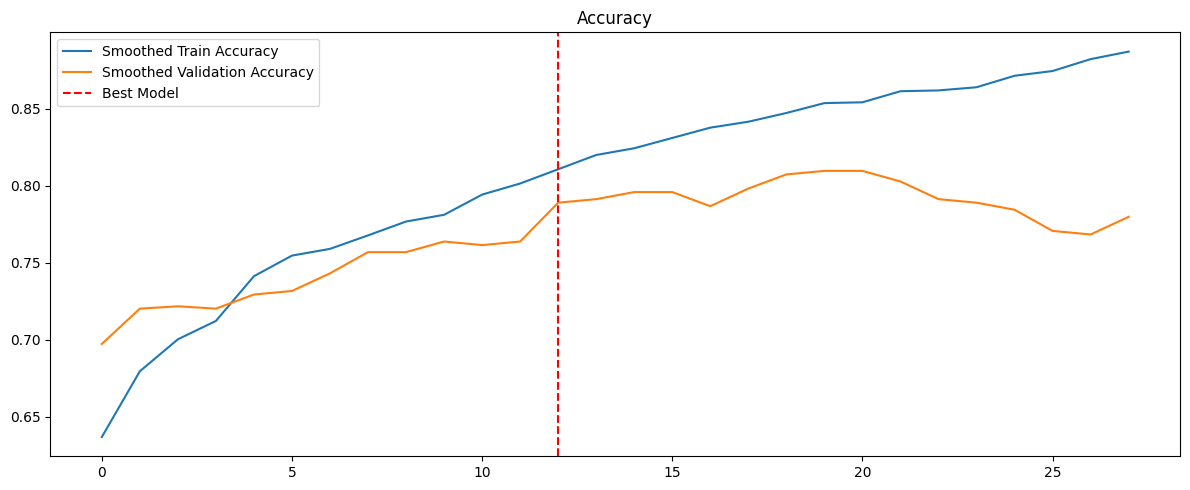

In [8]:
import matplotlib.pyplot as plt

# Extract values from the history 
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

def moving_average(data, window_size=3):
    """Computes the moving average of a list."""
    return [np.mean(data[max(0, i - window_size):i+1]) for i in range(len(data))]

window_size = 3 # You can adjust this for more or less smoothing
smooth_train_acc = moving_average(train_acc, window_size)
smooth_val_acc = moving_average(val_acc, window_size)
best_epoch = np.argmax(val_acc)  # Epoch where the validation loss is minimum

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
plt.plot(smooth_train_acc, label='Smoothed Train Accuracy')
plt.plot(smooth_val_acc, label='Smoothed Validation Accuracy')
plt.axvline(best_epoch, color='red', linestyle='--', label='Best Model')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

#### Observation: The weights are saved where there is no overfit seen where model is saved

# Saving Neural Network model

In [9]:
model.save("dependant_text_model.h5")

C:\Users\vijet\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
